# NUEXUS Technologies 

**Artificial Intelligence Internship Program**
- Week 1 


**Introduction of Group C**
- Zia ul Islam Mughal (NUAI242510003)
- Muhammad Qasim ()

# Task 1 

**Project Overview**

This project aims to predict employee attrition by analyzing key factors that contribute to turnover. Through predictive modeling, we can identify employees at risk of leaving the organization. This enables proactive interventions to retain valuable talent, reduce turnover costs, and boost overall employee satisfaction and productivity.

# **Exploratory Data Analysis (EDA)**

**1 - Importing the package**

In [1365]:
# Data Processing Packages
import pandas as pd 
import numpy as np 
# Data Visualization Packages
import matplotlib.pyplot as plt 
import seaborn as sns 



# Scaling 
from sklearn.preprocessing import StandardScaler
# train_test_split
from sklearn.model_selection import train_test_split 
# Model selection
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# Model Evalution
from sklearn.metrics import confusion_matrix , accuracy_score


#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

**2 - load Dataset**

In [1366]:
# This line of code is reading a CSV file named "WA_Fn-UseC_-HR-Employee-Attrition.csv" located 
# at the specified file path "C:\Users\ZIA UL ISLAM MUGHAL\Desktop\Employee Attrition Prediction\"
# into a pandas DataFrame named `df`.



df = pd.read_csv(r"C:\Users\ZIA UL ISLAM MUGHAL\Desktop\Employee Attrition Prediction\WA_Fn-UseC_-HR-Employee-Attrition.csv")

**3 - Basic Analysis**

In [1367]:
#Find the size of the data Rows x Columns
df.shape

(1470, 35)

In [1368]:
#Display first 5 rows of Employee Attrition data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [1369]:
# change name of column employee number to employee id 

df.rename(columns={'EmployeeNumber': 'EmployeeID'}, inplace=True)

In [1370]:
# `df.info()` is a method in pandas that provides a concise summary of a DataFrame. 
# It includes information such as the number of non-null values, data types, and memory usage.
# This method is useful for quickly understanding the structure and contents of a DataFrame.


df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1462 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeID                1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [1371]:
# `df.describe()` is a method in pandas that generates descriptive statistics of the DataFrame `df`. 
# It provides statistical information such as count, mean, standard deviation, minimum, maximum, and 
# various quantiles for numerical columns in the DataFrame.



df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeID,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1462.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.915185,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.137908,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**3 - Handle Missing Values**

In [1372]:
# Remove column 

df.drop('Over18', axis=1, inplace=True)

df.drop("EmployeeCount" , axis = 1 , inplace = True)

In [1373]:
# Check Missing Values

print(df.isnull().sum())

Age                         8
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               2
MonthlyRate                 7
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

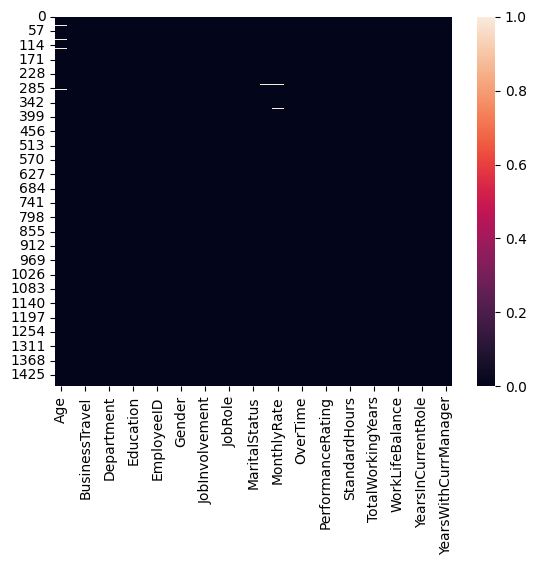

In [1374]:
#  plot graph show null values 

sns.heatmap(df.isnull())
plt.show()

In [1375]:
# Calculate mean of age 
avg_age = df["Age"].mean()
print("Mean of Age group is : " , avg_age)

# Add mean in missing cells of age column 

df["Age"].fillna(avg_age, inplace=True)

#  Calculate mean of  MonthlyIncome  
avg_MonthlyIncome = df["MonthlyIncome"].mean()
print("Mean of Age group is : " , avg_MonthlyIncome)

# Add mean in missing cells of Monthly Income column 
df["MonthlyIncome"].fillna("MonthlyIncome", inplace=True)


# Calculate mean of MonthlyRate 

avg_MonthlyRate = df["MonthlyRate"].mean()
print("Mean of MonthlyRate group is : " , avg_MonthlyRate)

# Add mean in missing cells of MonthlyRate column

df["MonthlyRate"].fillna(avg_MonthlyRate, inplace=True)


Mean of Age group is :  36.91518467852257
Mean of Age group is :  6503.231607629427
Mean of MonthlyRate group is :  14317.717019822283


<Axes: >

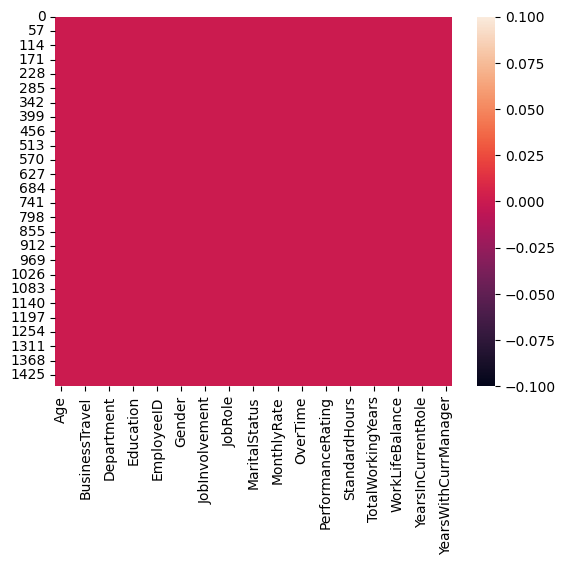

In [1376]:
#  plot graph show null values 

sns.heatmap(df.isnull())

**4 - Identify Outliers and Remove them.**

In [1377]:
df["Attrition"] = df["Attrition"].apply(lambda x : 1 if x == 'Yes' else 0)

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

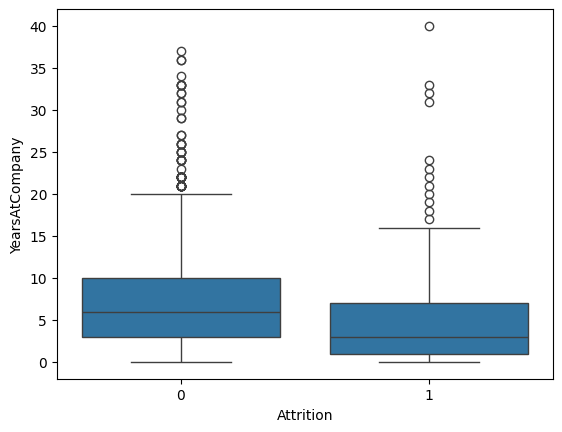

In [1378]:
sns.boxplot(x='Attrition',y='YearsAtCompany',data=df)

In [1379]:
#  Remove outliers 

Q1 = df["YearsAtCompany"].quantile(0.25)
Q3 = df["YearsAtCompany"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

df = df[(df["YearsAtCompany"] > lower_bound) & (df["YearsAtCompany"] < upper_bound)] 



<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

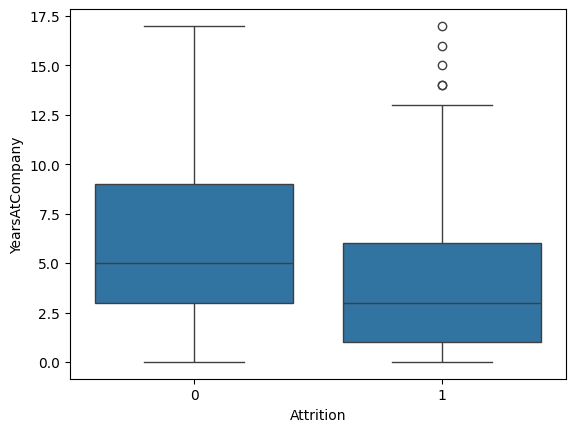

In [1380]:
sns.boxplot(x='Attrition',y='YearsAtCompany',data=df)

<Axes: xlabel='Attrition', ylabel='Age'>

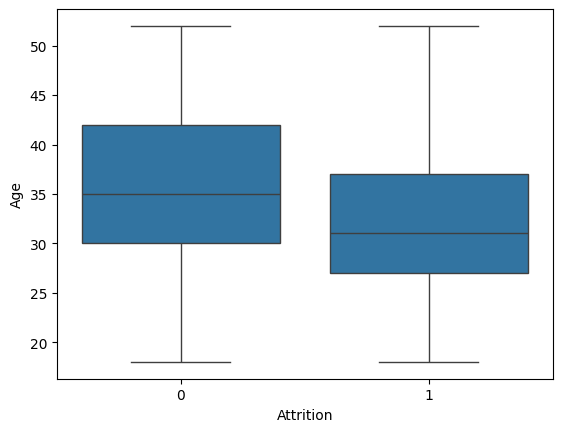

In [1381]:
df["Age"] = df["Age"].apply(lambda x: 52 if x > 50 else x )
sns.boxplot(x='Attrition',y='Age',data=df)


In [1382]:
#  remove outliers from age 

Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["Age"] > lower_bound) & (df["Age"] < upper_bound)] 



<Axes: xlabel='Attrition', ylabel='Age'>

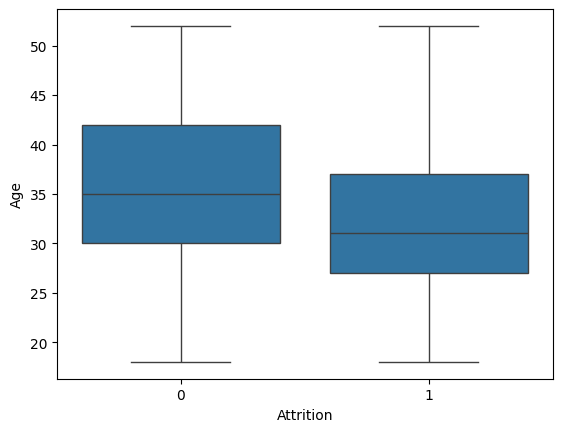

In [1383]:
sns.boxplot(x='Attrition',y='Age',data=df)

**Category Columns**

In [1384]:
cat_cols = df.columns[df.dtypes=='object']
df_cat = df[cat_cols]
print(cat_cols)
print(cat_cols.shape)


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'OverTime'],
      dtype='object')
(8,)


**Numerical Columns**

In [1385]:

num_cols = df.columns[df.dtypes != "object"]
df_num = df[num_cols]
print(num_cols)

print(num_cols.shape)   


 



Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeID', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(25,)


**Correlation**

In [1386]:
df.corrwith(df.Attrition, axis = 0, numeric_only=True).abs().sort_values(ascending = False).head(10)


Attrition               1.000000
TotalWorkingYears       0.187416
JobLevel                0.181290
YearsAtCompany          0.174839
Age                     0.171152
YearsInCurrentRole      0.167528
YearsWithCurrManager    0.152542
StockOptionLevel        0.143823
JobInvolvement          0.134171
JobSatisfaction         0.116099
dtype: float64

In [1387]:
df.corrwith(df.Attrition, axis = 0 ,numeric_only=True ).sort_values(ascending = False).head(10)

Attrition                  1.000000
DistanceFromHome           0.089475
NumCompaniesWorked         0.032866
MonthlyRate                0.016951
PerformanceRating          0.008658
PercentSalaryHike         -0.008677
HourlyRate                -0.012531
EmployeeID                -0.014645
YearsSinceLastPromotion   -0.020415
Education                 -0.037710
dtype: float64

# Data Visulization 

<Axes: xlabel='Attrition', ylabel='PercentSalaryHike'>

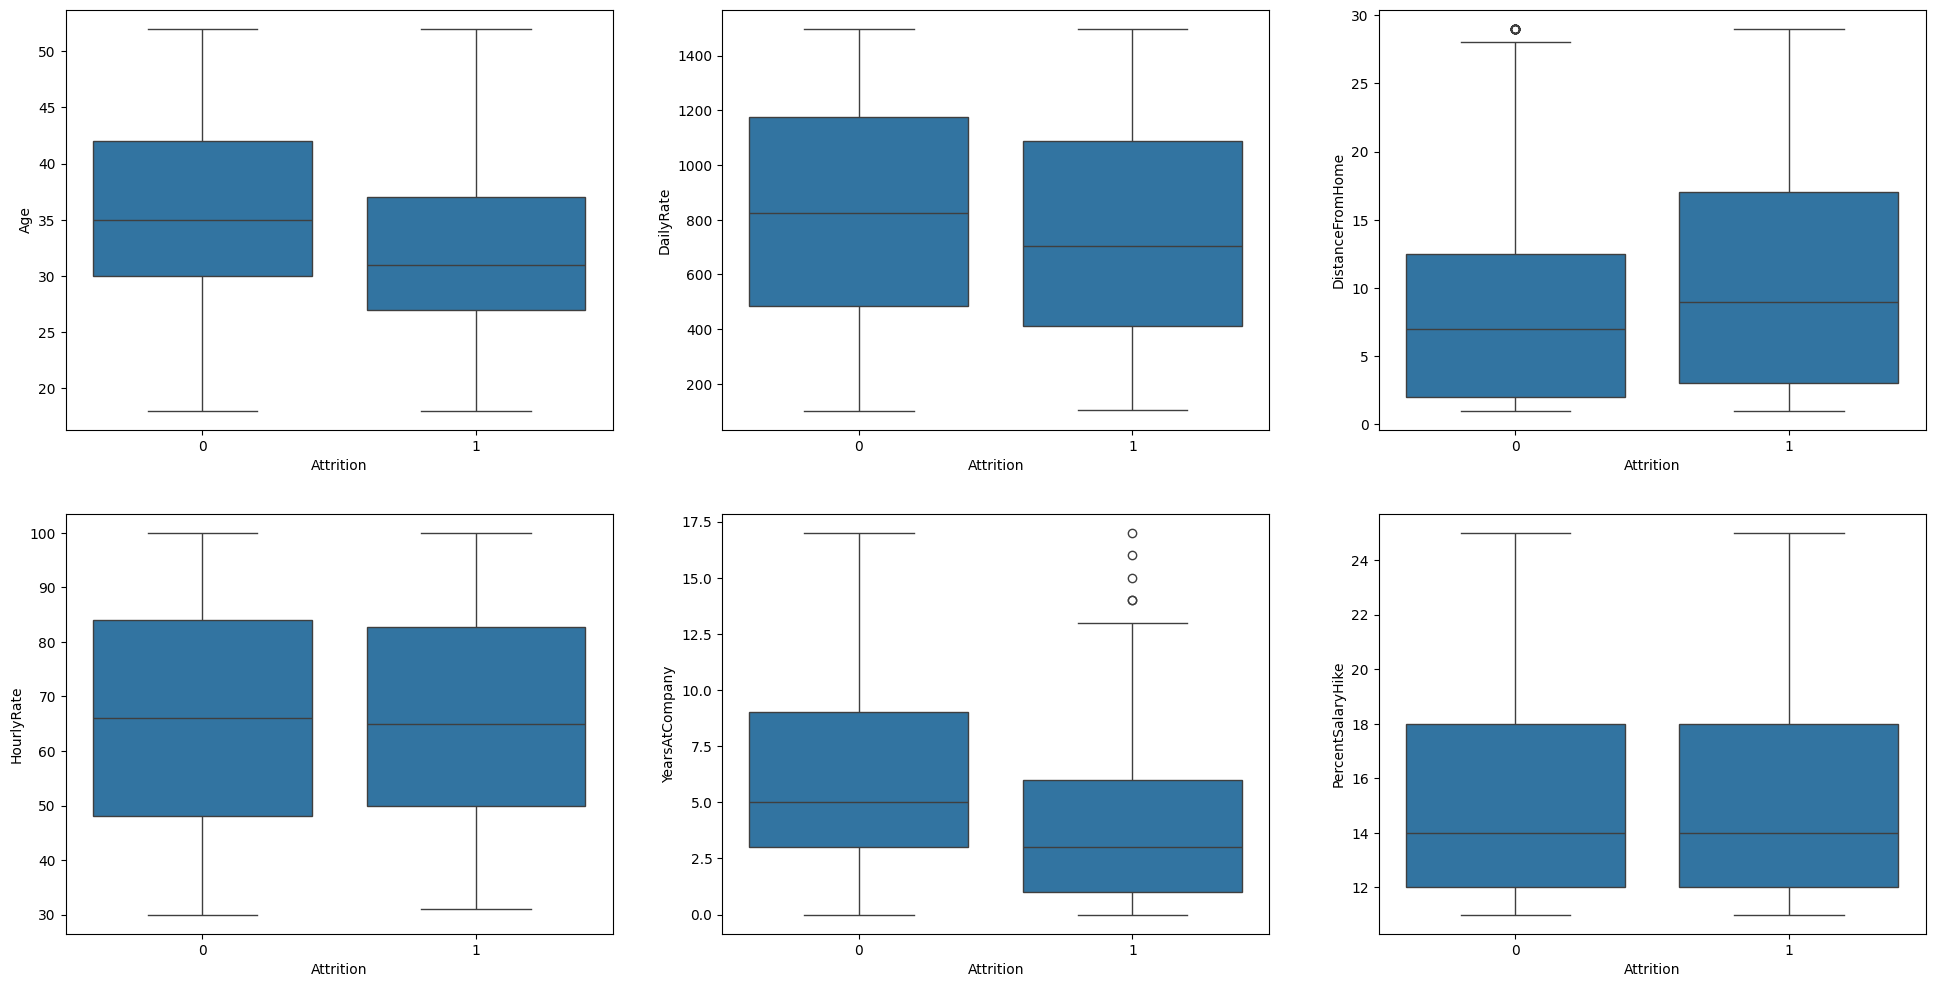

In [1388]:
plt.figure(figsize=(24,12))
plt.subplot(231)  ; sns.boxplot(x='Attrition',y='Age',data=df)
plt.subplot(232)  ; sns.boxplot(x='Attrition',y='DailyRate',data=df)
plt.subplot(233)  ; sns.boxplot(x='Attrition',y='DistanceFromHome',data=df)
plt.subplot(234)  ; sns.boxplot(x='Attrition',y='HourlyRate',data=df)
plt.subplot(235)  ; sns.boxplot(x='Attrition',y='YearsAtCompany',data=df)
plt.subplot(236)  ; sns.boxplot(x='Attrition',y='PercentSalaryHike',data=df)

<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

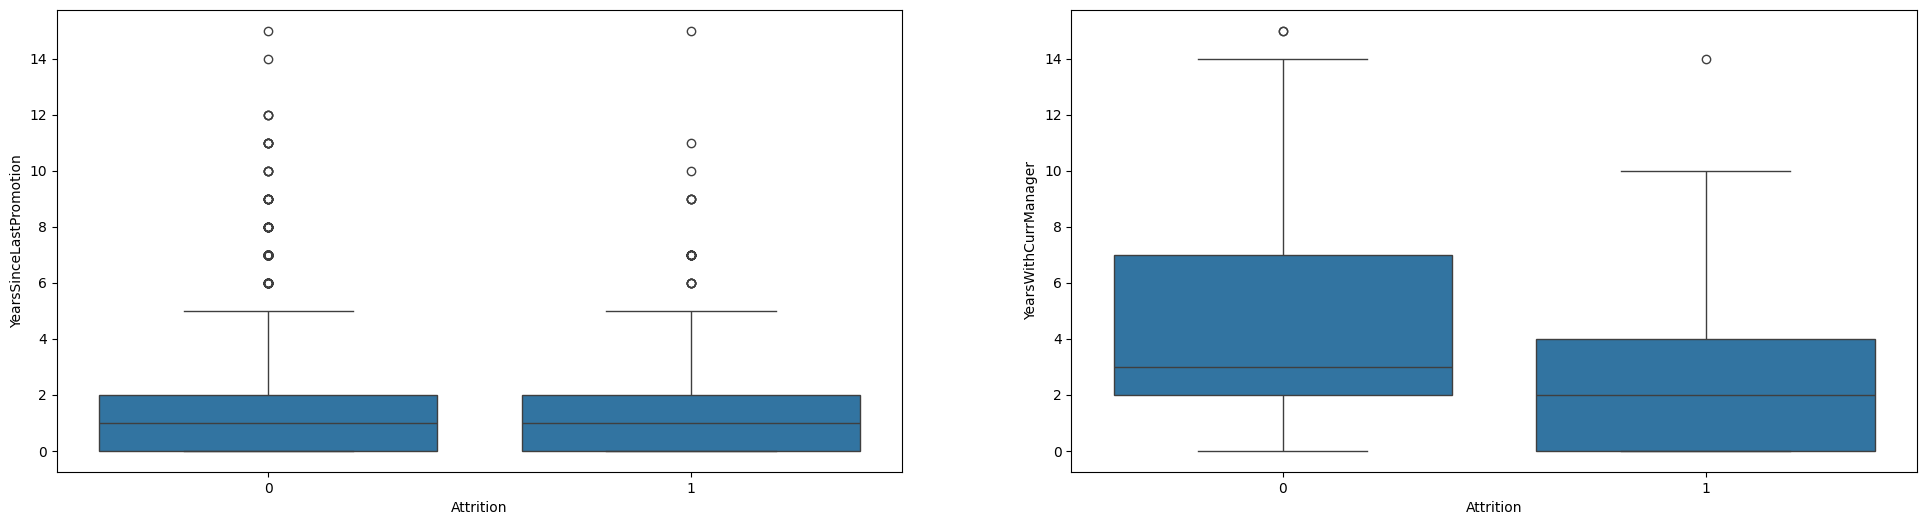

In [1389]:
#Comparing the numeric fields agains Attrition using boxplots
plt.figure(figsize=(24,6))
plt.subplot(121)  ; sns.boxplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.subplot(122)  ; sns.boxplot(x='Attrition',y='YearsWithCurrManager',data=df)


In [1390]:
#  remove outliers 

Q1 = df["YearsSinceLastPromotion"].quantile(0.25)
Q3 = df["YearsSinceLastPromotion"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["YearsSinceLastPromotion"] > lower_bound) & (df["YearsSinceLastPromotion"] < upper_bound)]

Q1 = df["YearsWithCurrManager"].quantile(0.25)

Q3 = df["YearsWithCurrManager"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df = df[(df["YearsWithCurrManager"] > lower_bound) & (df["YearsWithCurrManager"] < upper_bound)]



<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

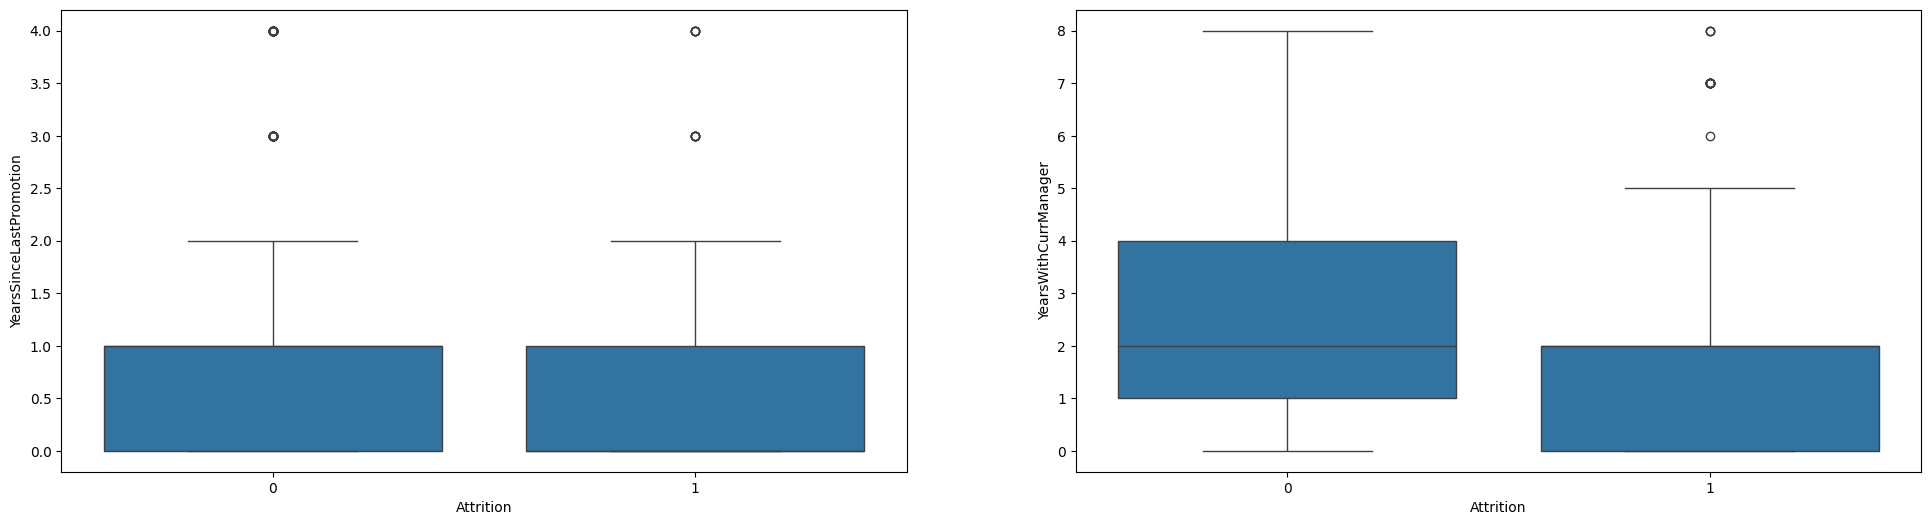

In [1391]:
plt.figure(figsize=(24,6))
plt.subplot(121)  ; sns.boxplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.subplot(122)  ; sns.boxplot(x='Attrition',y='YearsWithCurrManager',data=df)

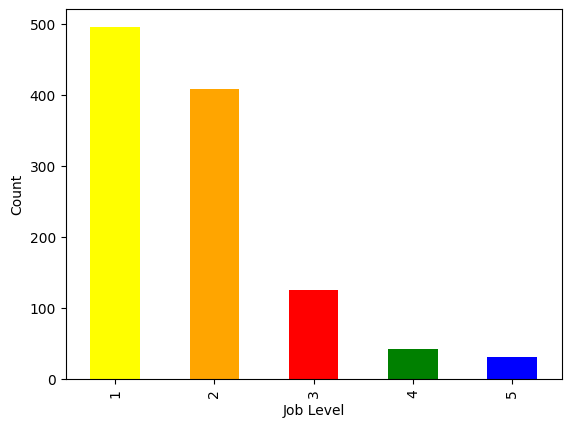

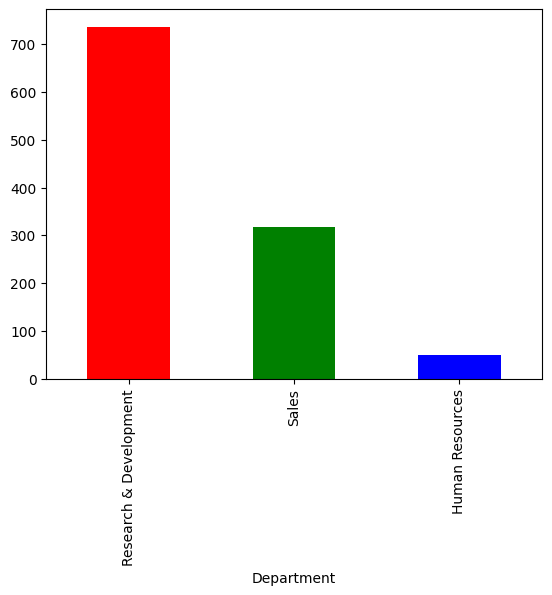

In [1392]:

df.JobLevel.value_counts().plot.bar(color=['yellow', 'orange','red', 'green', 'blue'])
#  x axis 

plt.xlabel('Job Level')
#  y axis 

plt.ylabel('Count') 
plt.show()

#  use different color in bars

df.Department.value_counts().plot.bar(color=['red', 'green', 'blue', 'yellow', 'orange'])

plt.show()




<Axes: >

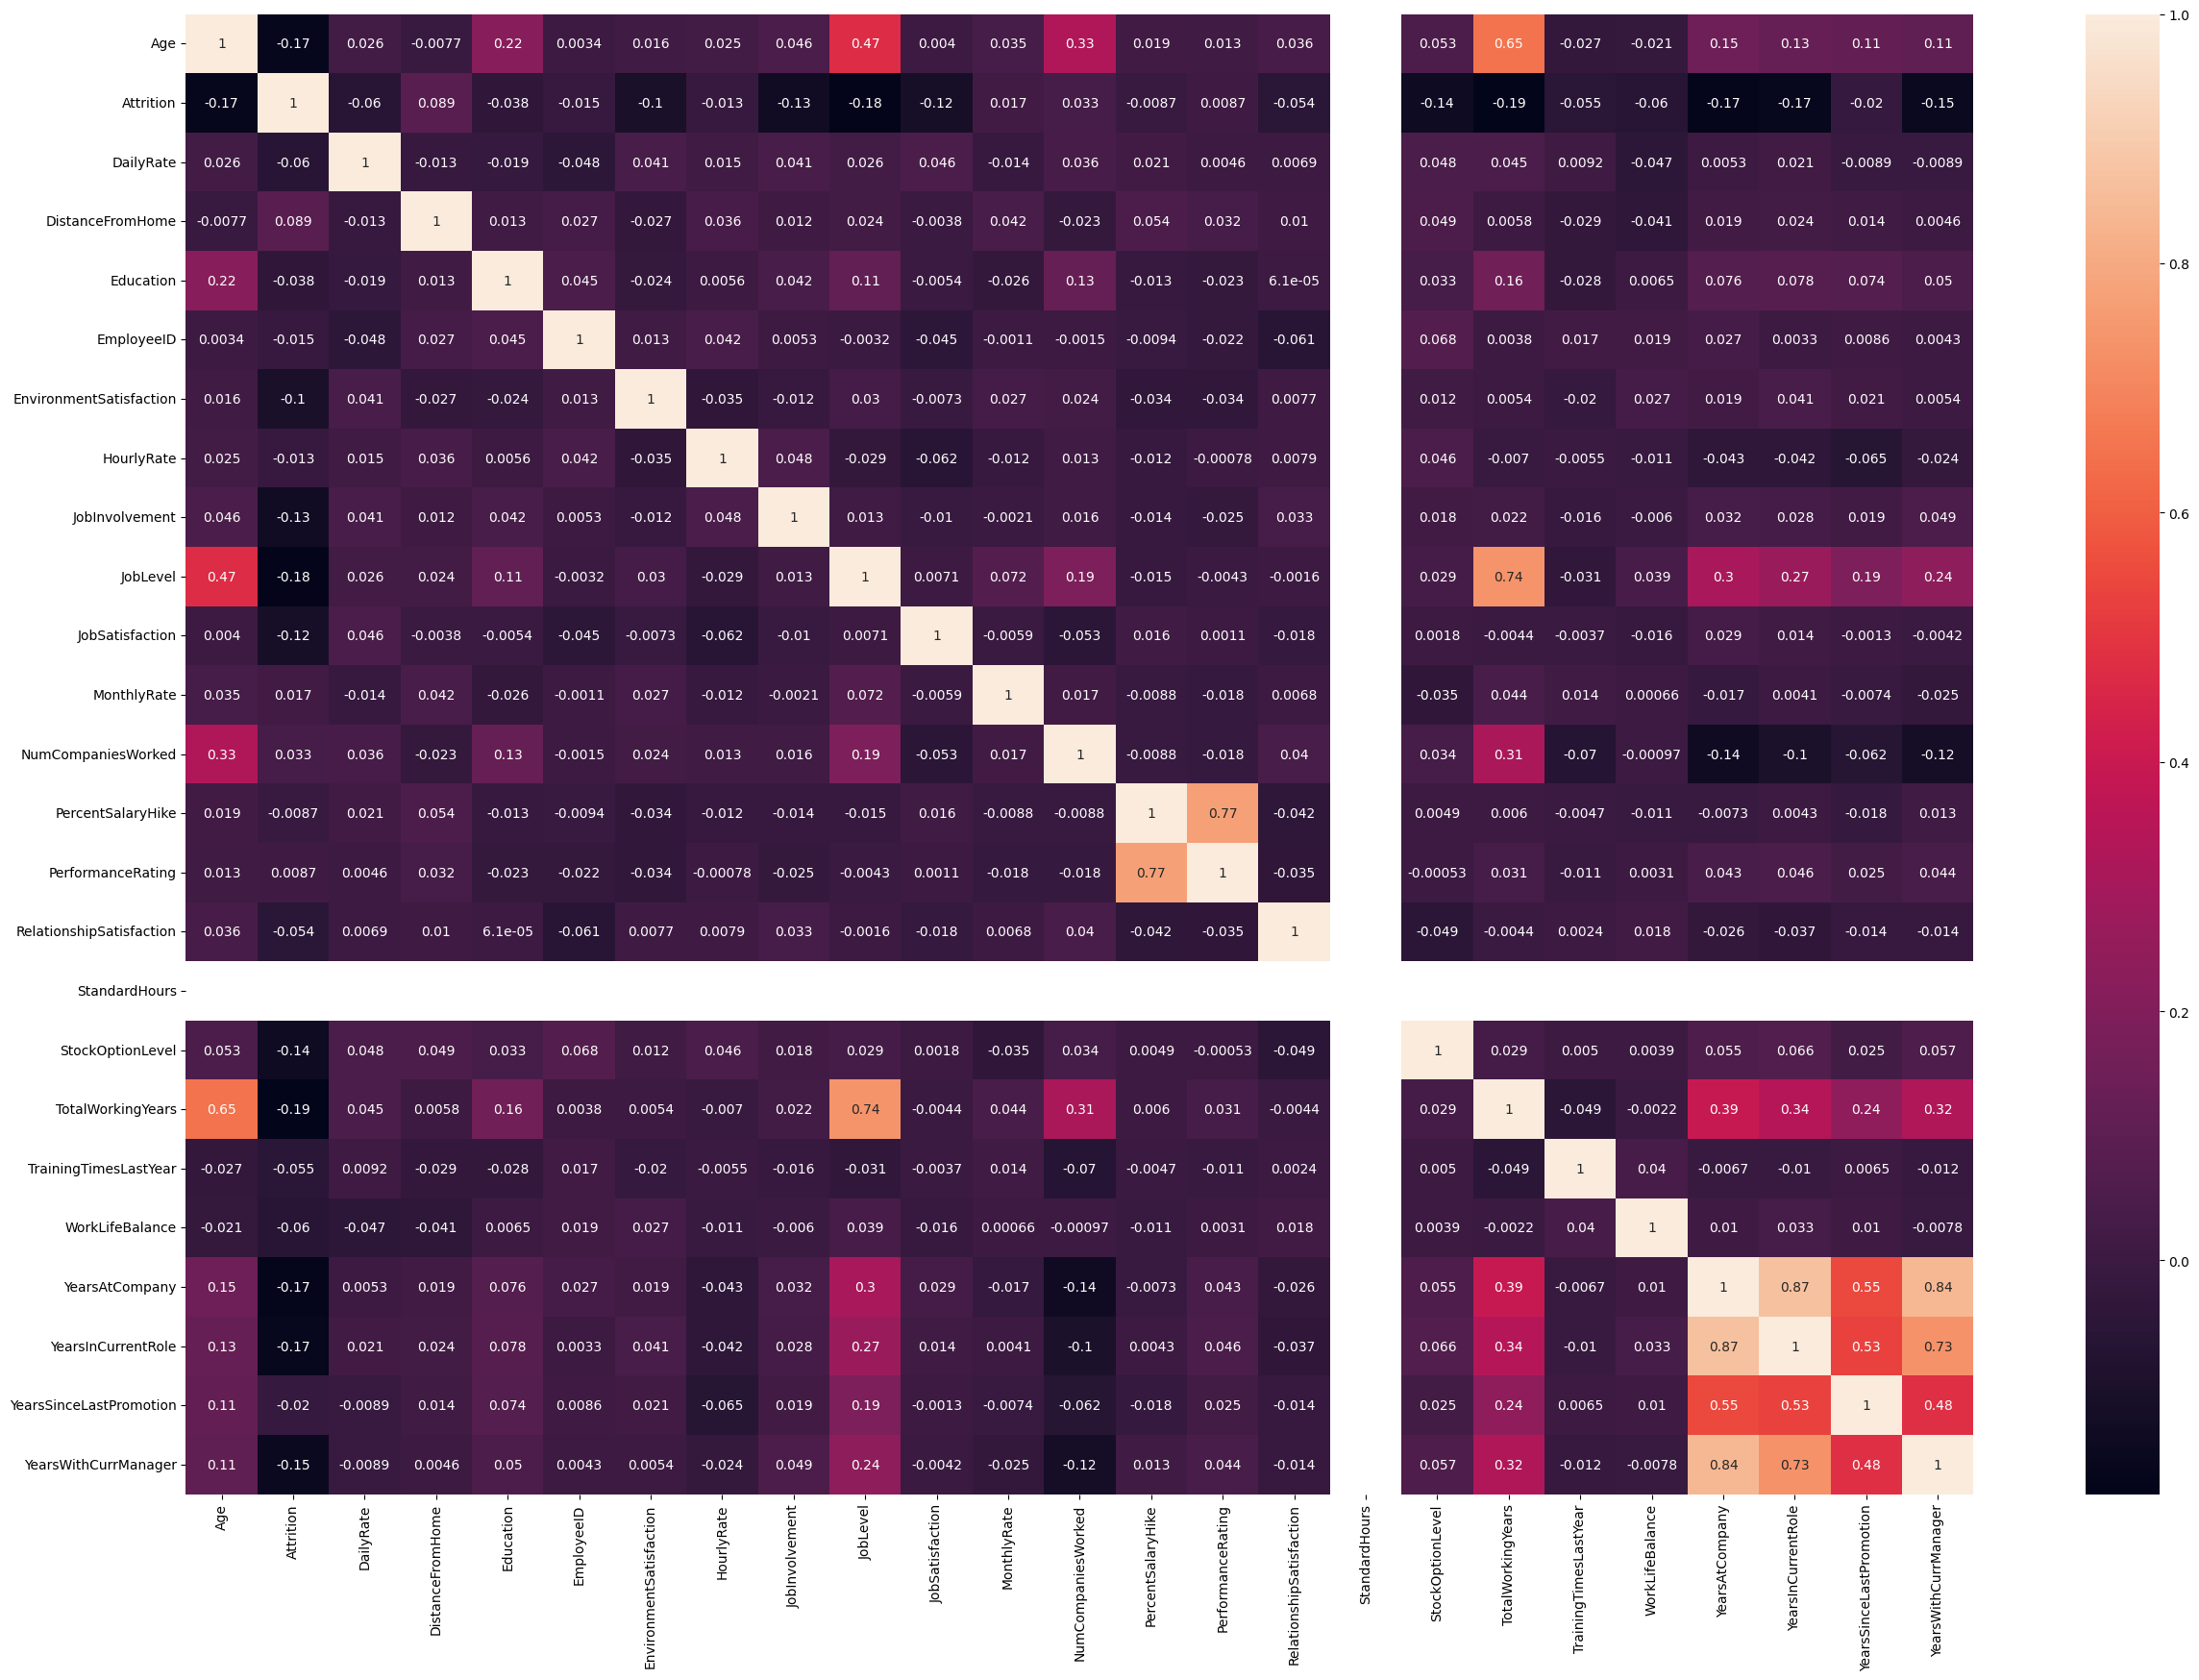

In [1393]:
plt.figure(figsize=(30, 20)) ; sns.heatmap(df_num.corr(), annot=True)

#  Feature Engineering 

In [1394]:
# we create a new feature to enhace prediction accuracy 

df['TotalWorkingYears'] = df['YearsAtCompany'] + df['YearsWithCurrManager'] + df['YearsSinceLastPromotion']

#  remove redundant columns

df.drop(['YearsAtCompany', 'YearsWithCurrManager', 'YearsSinceLastPromotion'], axis=1, inplace=True)

#  check the new feature

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeID,EnvironmentSatisfaction,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole
0,41.0,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,Yes,11,3,1,80,0,11,0,1,4
1,49.0,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,No,23,4,4,80,1,18,3,3,7
2,37.0,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,Yes,15,3,2,80,0,0,3,3,0
3,33.0,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,Yes,11,3,3,80,0,11,3,3,7
4,27.0,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,No,12,3,4,80,1,6,3,3,2


In [1395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1103 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1103 non-null   float64
 1   Attrition                 1103 non-null   int64  
 2   BusinessTravel            1103 non-null   object 
 3   DailyRate                 1103 non-null   int64  
 4   Department                1103 non-null   object 
 5   DistanceFromHome          1103 non-null   int64  
 6   Education                 1103 non-null   int64  
 7   EducationField            1103 non-null   object 
 8   EmployeeID                1103 non-null   int64  
 9   EnvironmentSatisfaction   1103 non-null   int64  
 10  Gender                    1103 non-null   object 
 11  HourlyRate                1103 non-null   int64  
 12  JobInvolvement            1103 non-null   int64  
 13  JobLevel                  1103 non-null   int64  
 14  JobRole      

# Data Visulization 

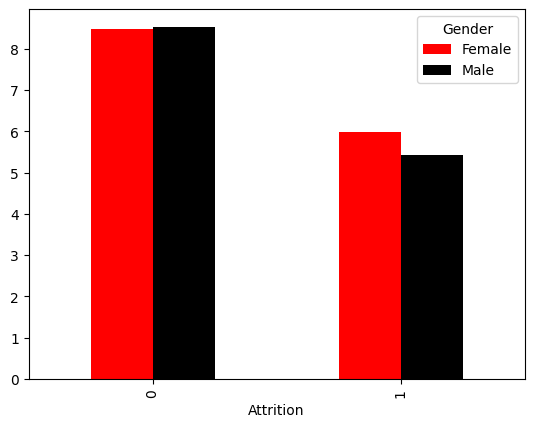

In [1396]:
# comparing the people who leave company of basis of history and also compare between gender 

df.groupby(['Attrition', 'Gender'])['TotalWorkingYears'].mean().unstack().plot.bar(color=['red', 'black'])

plt.show()





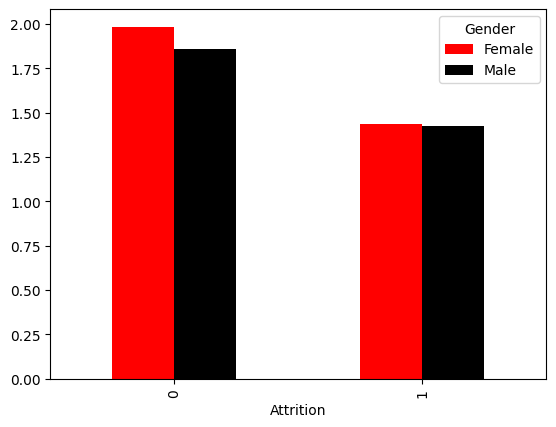

In [1397]:

#  comparing the people who leave company of basis of job level and also compare between gender

df.groupby(['Attrition', 'Gender'])['JobLevel'].mean().unstack().plot.bar(color=['red', 'black'])

plt.show()



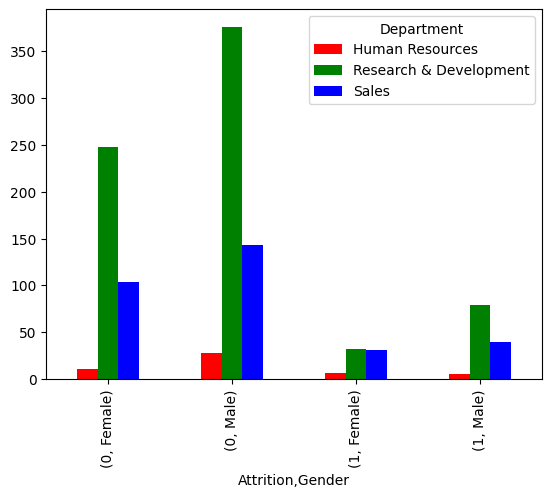

In [1398]:
# #  comparing the people who leave company of basis of department and also compare between gender

df.groupby(['Attrition', 'Gender'])['Department'].value_counts().unstack().plot.bar(color=['red', 'green', 'blue'])

plt.show()



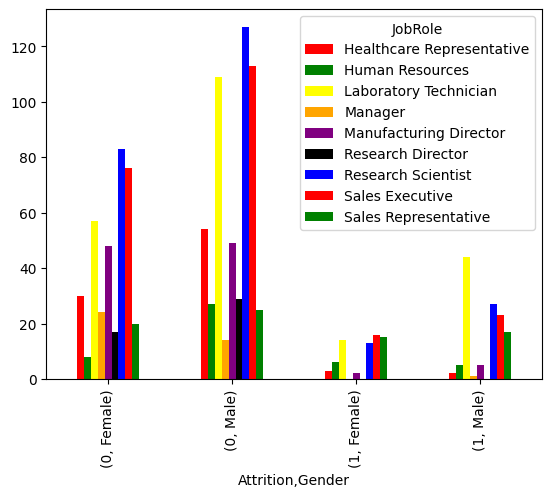

In [1399]:
# #  comparing the people who leave company of basis of job role and also compare between gender

df.groupby(['Attrition', 'Gender'])['JobRole'].value_counts().unstack().plot.bar(color=['red', 'green','yellow', 'orange','purple', 'black', 'blue'])

plt.show()



### **Convert Categorical values to Numeric Values**

In [1400]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeID,EnvironmentSatisfaction,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole
0,41.0,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,Yes,11,3,1,80,0,11,0,1,4
1,49.0,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,No,23,4,4,80,1,18,3,3,7
2,37.0,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,Yes,15,3,2,80,0,0,3,3,0
3,33.0,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,Yes,11,3,3,80,0,11,3,3,7
4,27.0,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,No,12,3,4,80,1,6,3,3,2


In [1401]:
# This code snippet is using the `get_dummies()` function from the pandas library to convert 
# categorical variables in the DataFrame `df` into dummy/indicator variables.
# This means that each categorical variable will be converted into multiple binary columns,
# where each column represents a unique category and contains either a 0 or 1 to indicate 
# the presence of that category in the original data. The original categorical columns will
# be replaced with these dummy columns in the DataFrame `df`.


df = pd.get_dummies(df)

In [1402]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeID,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,MonthlyIncome_19627.0,MonthlyIncome_19636.0,MonthlyIncome_19658.0,MonthlyIncome_19701.0,MonthlyIncome_19740.0,MonthlyIncome_19859.0,MonthlyIncome_19926.0,MonthlyIncome_19943.0,OverTime_No,OverTime_Yes
0,41.0,1,1102,1,2,1,2,94,3,2,...,False,False,False,False,False,False,False,False,False,True
1,49.0,0,279,8,1,2,3,61,2,2,...,False,False,False,False,False,False,False,False,True,False
2,37.0,1,1373,2,2,4,4,92,2,1,...,False,False,False,False,False,False,False,False,False,True
3,33.0,0,1392,3,4,5,4,56,3,1,...,False,False,False,False,False,False,False,False,False,True
4,27.0,0,591,2,1,7,1,40,3,1,...,False,False,False,False,False,False,False,False,True,False


In [1403]:
def convert_bool_to_int(df):
    for col in df.columns:
        if df[col].dtype == bool:
            df[col] = df[col].apply(lambda x: 1 if x == True else 0)
    return df

df = convert_bool_to_int(df)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeID,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,MonthlyIncome_19627.0,MonthlyIncome_19636.0,MonthlyIncome_19658.0,MonthlyIncome_19701.0,MonthlyIncome_19740.0,MonthlyIncome_19859.0,MonthlyIncome_19926.0,MonthlyIncome_19943.0,OverTime_No,OverTime_Yes
0,41.0,1,1102,1,2,1,2,94,3,2,...,0,0,0,0,0,0,0,0,0,1
1,49.0,0,279,8,1,2,3,61,2,2,...,0,0,0,0,0,0,0,0,1,0
2,37.0,1,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,0,0,0,1
3,33.0,0,1392,3,4,5,4,56,3,1,...,0,0,0,0,0,0,0,0,0,1
4,27.0,0,591,2,1,7,1,40,3,1,...,0,0,0,0,0,0,0,0,1,0


### **Separating the Feature and Target Variable**

In [1404]:
x = df.drop(['Attrition'],axis = 1 )
y = df['Attrition']

### **Scaling the data values to standardize the range of independent variables**

In [1405]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

### **Split the data into Training set and Testing set**

In [1406]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

### **Function definition**

This function is likely used to train and test a machine learning model. It takes four parameters: `x_train` (training data features), `y_train` (training data labels), `x_test` (testing data features), and `Model` (the machine learning model to be trained and tested). The function is expected to use the training data (`x_train` and `y_train`) to train the model and then use the trained model to make predictions on the testing data (`x_test`).




In [1407]:
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)
        #This line of code calculates the accuracy of the
    # model by dividing the sum of the diagonal elements
    # of the confusion matrix by the total number of 
    # samples in the confusion matrix.

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

This function `cm_plot` is used to plot a confusion matrix. It takes two parameters `cm` which is the confusion matrix and `Model` which is the name of the model being evaluated.


In [1408]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### **PERFORM PREDICTIONS USING MACHINE LEARNING ALGORITHMS**

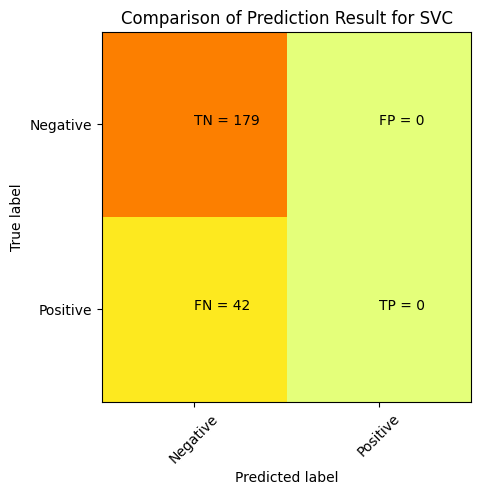

Accuracy of the Model SVC 81.0%


In [1409]:
from sklearn.svm import SVC , NuSVC
Model = "SVC"
model = SVC()

train_test_ml_model(X_train, y_train, X_test, Model)

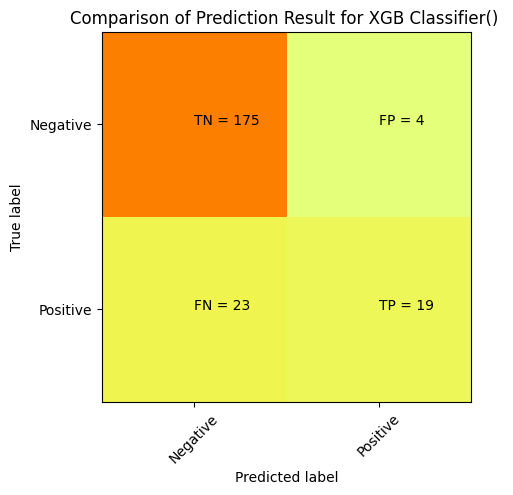

Accuracy of the Model XGB Classifier()  87.8%


In [1410]:
from xgboost import XGBClassifier 
Model = "XGB Classifier() "
model = XGBClassifier() 

train_test_ml_model(X_train, y_train, X_test, Model)

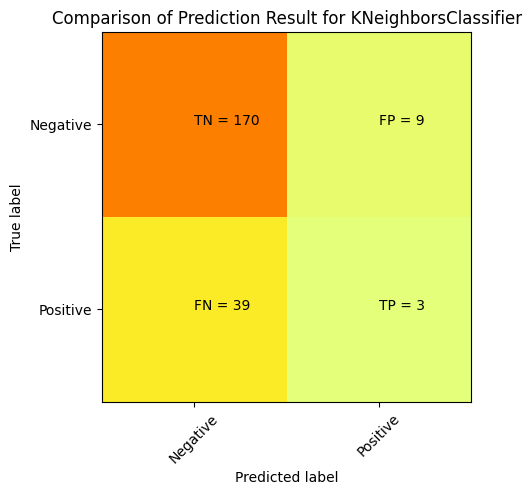

Accuracy of the Model KNeighborsClassifier 78.3%


In [1411]:
from sklearn.neighbors import KNeighborsClassifier 
Model = "KNeighborsClassifier"
model = KNeighborsClassifier() 

train_test_ml_model(X_train, y_train, X_test, Model)

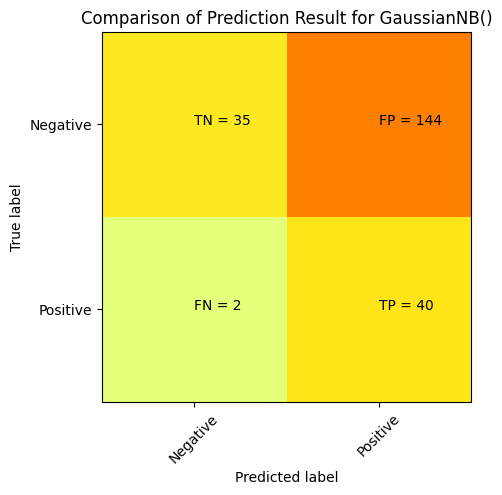

Accuracy of the Model GaussianNB() 33.9%


In [1412]:
from sklearn.naive_bayes import GaussianNB 
Model = "GaussianNB()"

model = GaussianNB()

train_test_ml_model(X_train, y_train, X_test, Model)

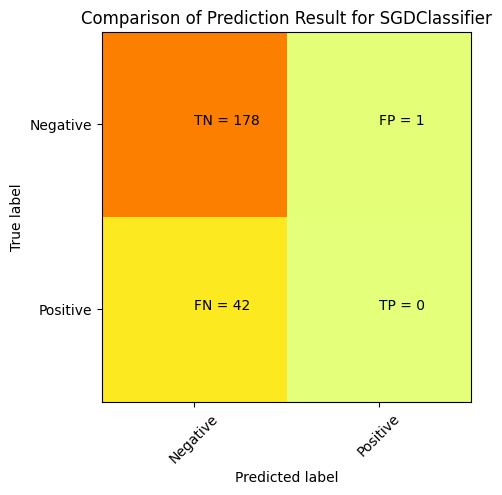

Accuracy of the Model SGDClassifier 80.5%


In [1413]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

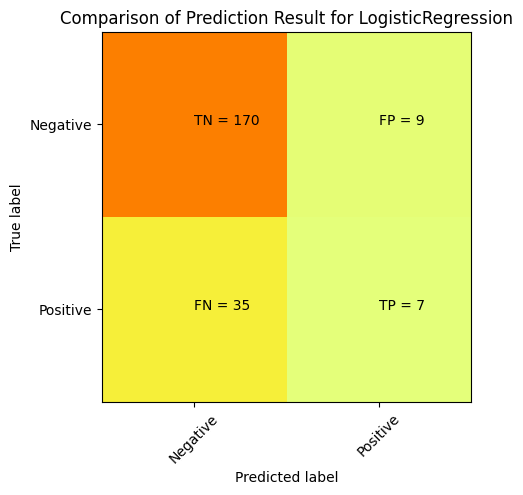

Accuracy of the Model LogisticRegression 80.1%


In [1414]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

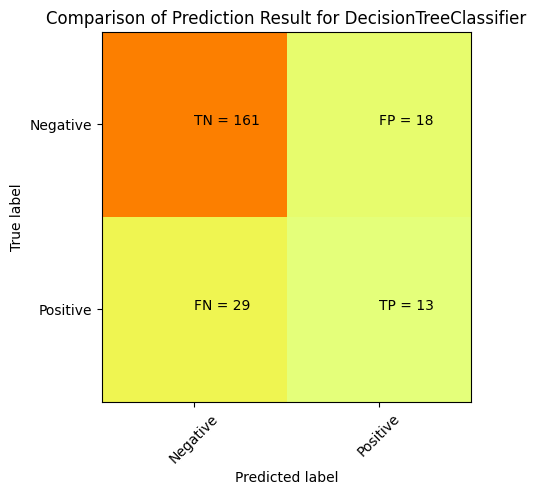

Accuracy of the Model DecisionTreeClassifier 78.7%


In [1415]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

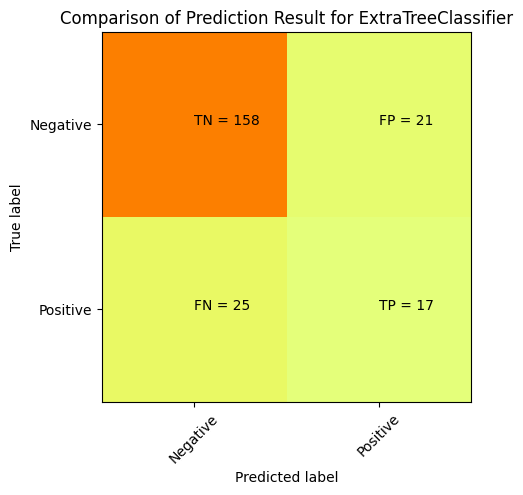

Accuracy of the Model ExtraTreeClassifier 79.2%


In [1416]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

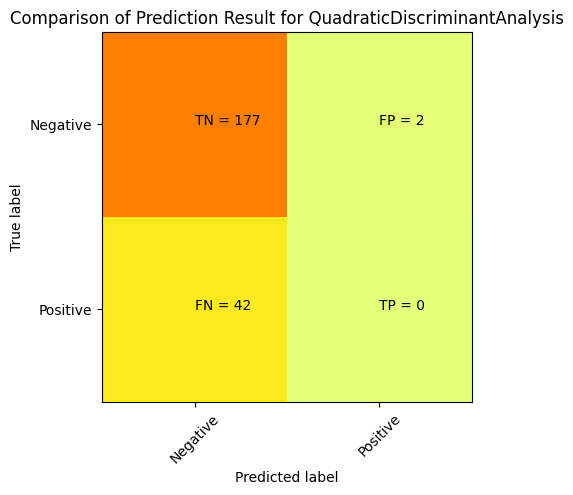

Accuracy of the Model QuadraticDiscriminantAnalysis 80.1%


In [1417]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "QuadraticDiscriminantAnalysis"
model = QuadraticDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

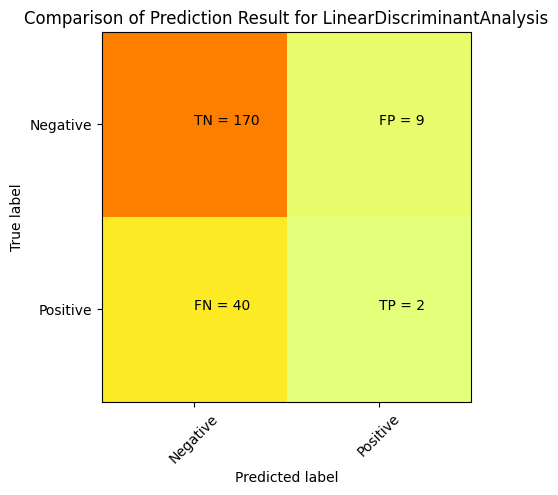

Accuracy of the Model LinearDiscriminantAnalysis 77.8%


In [1418]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

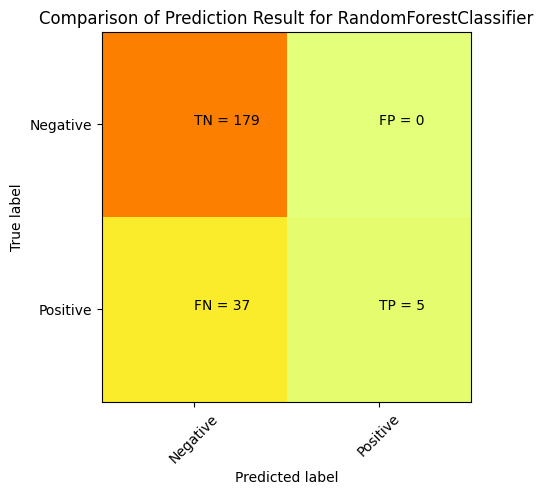

Accuracy of the Model RandomForestClassifier 83.3%


In [1419]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

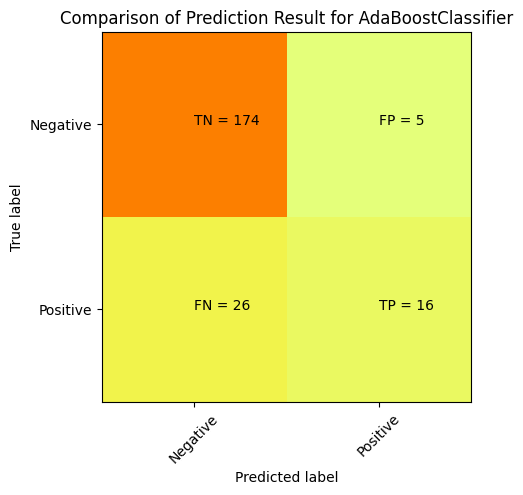

Accuracy of the Model AdaBoostClassifier 86.0%


In [1420]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

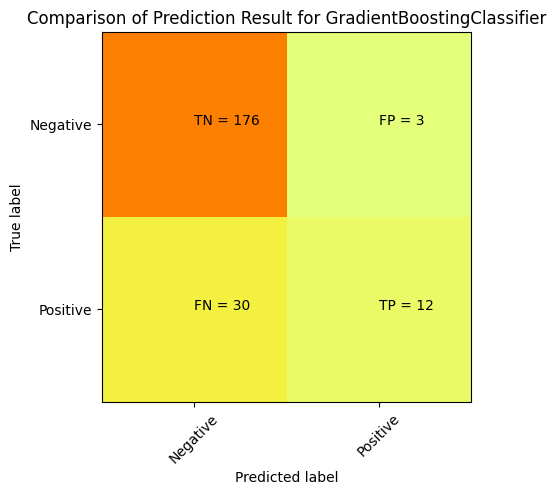

Accuracy of the Model GradientBoostingClassifier 85.1%


In [1421]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)